18


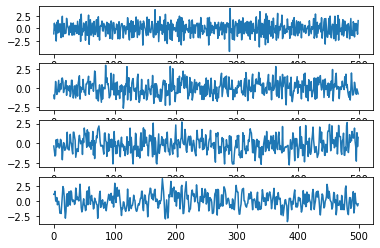

In [11]:
#########Time Series generation

###Moving average
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1,-0.5])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=500)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.5])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=500)
plt.plot(simulated_data_2)


ma_data = []
####Moving average sample generation
vals = np.arange(-0.9,0.9,0.1)
for r in vals:
    ar1 = np.array([1])
    ma1 = np.array([1,r])
    MA_object1 = ArmaProcess(ar1, ma1)
    simulated_data = MA_object1.generate_sample(nsample=500)
    ma_data.append(simulated_data)

print (len(ma_data))
plt.subplot(4,1,1)
plt.plot(ma_data[0])
plt.subplot(4,1,2)
plt.plot(ma_data[10])
plt.subplot(4,1,3)
plt.plot(ma_data[12])
plt.subplot(4,1,4)
plt.plot(ma_data[17])



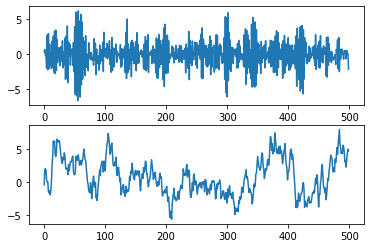

18


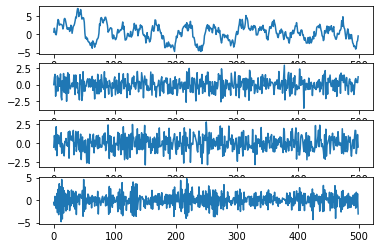

In [2]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, 0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1,ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=500)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1,-0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=500)
plt.plot(simulated_data_2)
plt.show()


ar_data = []
####AR sample generation
vals = np.arange(-0.9,0.9,0.1)
for r in vals:
    ar1 = np.array([1,r])
    ma1 = np.array([1])
    MA_object1 = ArmaProcess(ar1, ma1)
    simulated_data = MA_object1.generate_sample(nsample=500)
    ar_data.append(simulated_data)

print (len(ar_data))
plt.subplot(4,1,1)
plt.plot(ar_data[0])
plt.subplot(4,1,2)
plt.plot(ar_data[10])
plt.subplot(4,1,3)
plt.plot(ar_data[12])
plt.subplot(4,1,4)
plt.plot(ar_data[17])



In [85]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#####Generating time series AR of two different parameters:
ar_data = []
n = 0;
while (n<50):
    if (n<25):
        r = 0.9
    if (n>=25):
        r = -0.9
    
    ar1 = np.array([1,r])
    ma1 = np.array([1])
    MA_object1 = ArmaProcess(ar1, ma1)
    simulated_data = MA_object1.generate_sample(nsample=500)
    ar_data.append(simulated_data)
    n = n+1;
    
print(len(ar_data))

50


50


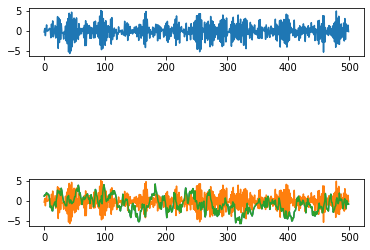

In [86]:
print (len(ar_data))
plt.subplot(4,1,1)
plt.plot(ar_data[0])
#plt.subplot(4,1,2)
#plt.plot(ar_data[10])
#plt.subplot(4,1,3)
#plt.plot(ar_data[25])
plt.subplot(4,1,4)
plt.plot(ar_data[35])


plt.plot(ar_data[0])
plt.plot(ar_data[35])

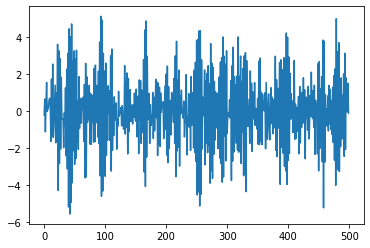

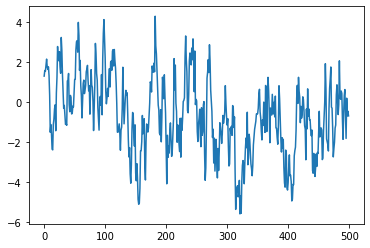

In [87]:
plt.figure()
plt.plot(ar_data[0])
plt.figure()
plt.plot(ar_data[35])

In [88]:
data = ar_data
print(len(data))

50


50


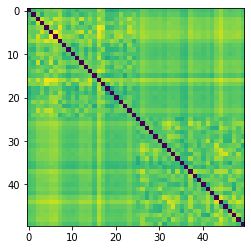

In [89]:
from sklearn.metrics.pairwise import euclidean_distances
#X = [[0, 1], [1, 1]]1
# distance between rows of X
dist = euclidean_distances(data, data)
print(len(dist))
plt.imshow(dist)

In [90]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist)
print(cluster.labels_)

[0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [92]:
from dtw import dtw

# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2
dist_dtw = []
for i in range(0,49):
    dist_temp = []
    for j in range(0,49):
        dist, cost_matrix, acc_cost_matrix, path = dtw(data[i], data[j], dist=l2_norm)
        dist_temp.append(dist)
    dist_dtw.append(dist_temp)

print(len(dist_dtw))
plt.imshow(dist_dtw)

KeyboardInterrupt: 

In [ ]:
plt.imshow(dist_dtw)
print (dist_dtw)

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist_dtw)
print(cluster.labels_)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [84]:
from sklearn.metrics.pairwise import pairwise_distances
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Y1 = pairwise_distances(data, data, metric='euclidean')
Y2 = pairwise_distances(data, data, metric='manhattan')
Y3 = pairwise_distances(data, data, metric='cityblock')
Y4 = pairwise_distances(data, data, metric='l2')


plt.figure(1)
dendrogram = sch.dendrogram(sch.linkage(dist_dtw, method='ward'))
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc1 = cluster.fit_predict(Y1)
print ("Euclidean")
print(y_hc1)
y_hc2 = cluster.fit_predict(dist_dtw)
print ("Dynamic Time Warping")
print(y_hc2)
y_hc3 = cluster.fit_predict(Y2)
print ("Manhattan")
print(y_hc3)
y_hc4 = cluster.fit_predict(Y3)
print ("cityblock")
print(y_hc4)
y_hc5 = cluster.fit_predict(Y4)
print ("L2 norm")
print(y_hc5)


print(len(Y2))
plt.figure(0)
plt.imshow(Y2)

ValueError: setting an array element with a sequence.

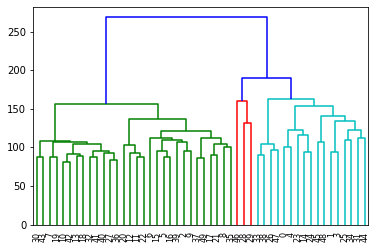

In [105]:
plt.figure(2)
dendrogram = sch.dendrogram(sch.linkage(Y1, method='ward'))

In [40]:
#####PCA
from numpy import array
t = array(ar_data)
win = t[:,12:24]
print (win.shape)
    

(50, 12)


In [107]:
from sklearn.decomposition import PCA
pca_data = [];
window_size = 10;
st = 0;
for i in range(0,12,488):
    en = i+window_size
    temp_win = t[:,i:en]
    pca_mod = PCA(n_components = 6).fit(temp_win)
    pca_win = pca_mod.fit_transform(temp_win)
    pca_data.append(pca_win)
    
print(array(pca_data[0]).shape)

pca_dt = pca_data[0];

(50, 6)


50


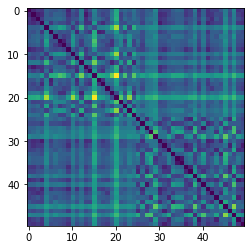

In [113]:
from sklearn.metrics.pairwise import euclidean_distances
#X = [[0, 1], [1, 1]]1
# distance between rows of X
dist = euclidean_distances(pca_dt, pca_dt)
print(len(dist))
plt.imshow(dist)

c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


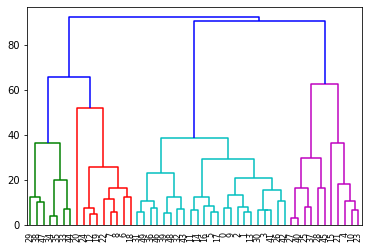

In [114]:
plt.figure(2)
dendrogram = sch.dendrogram(sch.linkage(dist, method='ward'))

In [109]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist)
print(cluster.labels_)

[0 0 0 0 3 0 2 2 2 0 3 0 2 0 0 3 0 0 2 2 5 3 2 3 2 4 0 4 4 1 0 0 0 1 1 1 0
 4 1 0 4 0 0 0 1 4 0 1 0 0]


c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


49


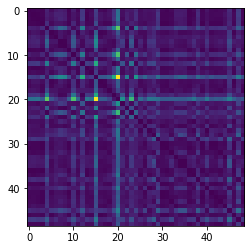

In [117]:
from dtw import dtw

# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2
dist_dtw = []
for i in range(0,49):
    dist_temp = []
    for j in range(0,49):
        dist, cost_matrix, acc_cost_matrix, path = dtw(pca_dt[i], pca_dt[j], dist=l2_norm)
        dist_temp.append(dist)
    dist_dtw.append(dist_temp)

print(len(dist_dtw))
plt.imshow(dist_dtw)

c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


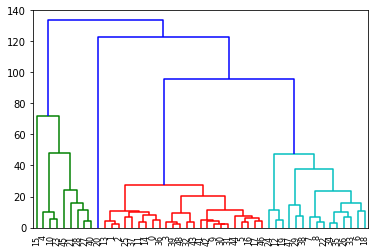

In [118]:
plt.figure(2)
dendrogram = sch.dendrogram(sch.linkage(dist_dtw, method='ward'))

In [111]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist_dtw)
print(cluster.labels_)

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0]


c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
